## Galaxies in Illustris

Above, we were looking at star particles in simulated galaxies, similar to how we looked at stars in the Milky Way using Gaia data. We can instead look at many galaxies' overall properties, similar to how we looked at galaxies in Galaxy Zoo. We can look at some of the fully evolved galaxies in IllustrisTNG by examining the Illustris_galaxies file in the Data folder.

In [2]:
# read in the data (Illustris_galaxies.csv)
import pandas as pd

illustris_data = pd.read_csv('../Data/Illustris_galaxies.csv')
illustris_data.head()

,Galaxy ID,Stellar Mass [Mo],g band,r band,Probability is spiral
0,0,3.565573e+12,-23.256830,-24.071047,0.285813
1,1,5.376783e+11,-21.941610,-22.712160,0.817303
2,2,6.034437e+11,-22.199574,-22.951138,0.941455
3,3,1.650696e+11,-21.828701,-22.411537,0.998825
4,4,1.283022e+11,-20.685863,-21.426640,0.113466


In [ ]:
# display the data set


**How many rows are there?** 

**Answer:** 4

**How many columns are there?** 

**Answer:** 5

**Fill in the rows for each corresponding column**

| Column Header | Definition | Unit |
| :- | :- | :- |
| Galaxy ID | name/identifier of galaxy | 
| Stellar Mass [Mo] | | 
| g band |Type of film to view light from a galaxy  | 
| r band | Type of film to view light from a galaxy | 
| Probability is spiral | The chance of the galazy is spiral | 

In [3]:
# create two boolean arrays for if a galaxy is a spiral galaxy or an elliptical galaxy
# use the same probability cut off that we did with the galaxy zoo
# you can assume a galaxy is elliptical if it is is less than 20% chance a spiral galaxy
# Create boolean arrays for classification

elliptical_bool = illustris_data['Probability is spiral'] < 0.2
spiral_bool = illustris_data['Probability is spiral'] > 0.8

# Calculate percentages
total_galaxies = len(illustris_data)
elliptical_percent = (sum(elliptical_bool) / total_galaxies) * 100
spiral_percent = (sum(spiral_bool) / total_galaxies) * 100

print(f"Percentage of spiral galaxies: {round(spiral_percent, 2)}%")
print(f"Percentage of elliptical galaxies: {round(elliptical_percent, 2)}%")

Percentage of spiral galaxies: 26.18%
Percentage of elliptical galaxies: 11.76%


**What percentage of these galaxies are spirals?**

**Answer:** 26.18%

**What percentage of these galaxies are ellipticals?**

**Answer:** 11.76%

In [4]:
#fill in the name of the boolean arrays where you see $
print('The percentage of spiral galaxies is', round(sum(spiral_bool)/len(spiral_bool) * 100, 2), '%')
print('The percentage of elliptical galaxies is', round(sum(elliptical_bool)/len(elliptical_bool) * 100, 2), '%')

The percentage of spiral galaxies is 26.18 %
The percentage of elliptical galaxies is 11.76 %


**How do these percentages compare to the ones you found in the Galaxy Zoo data?**

**Answer:** 

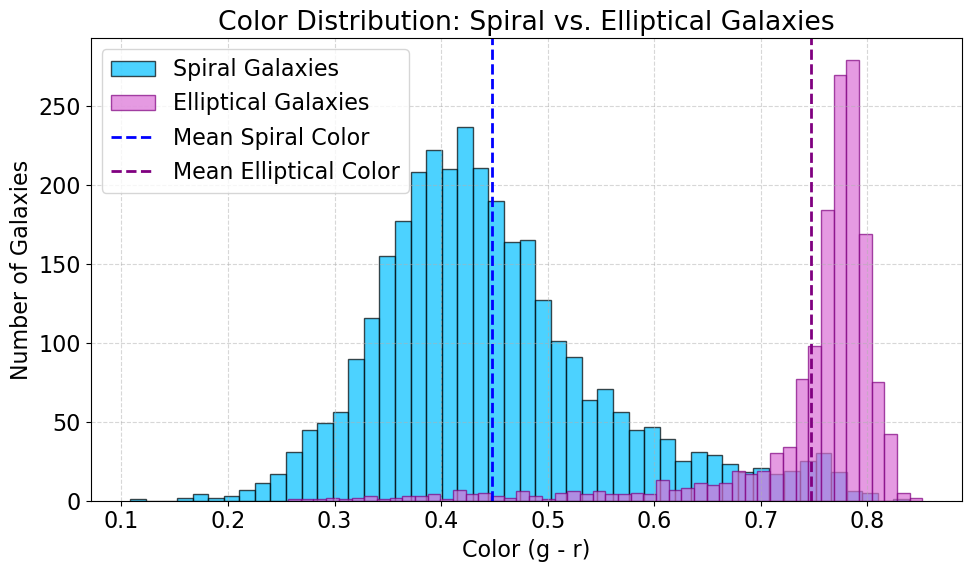

Spiral Galaxies: Mean color = 0.447 Std Dev = 0.11
Elliptical Galaxies: Mean color = 0.747 Std Dev = 0.086


In [12]:
# create a single plot showing histograms of the colors of the two types of galaxies 

# import our graphing package and numpy
import matplotlib.pyplot as plt
import numpy as np

#I need to read the data in 
illustris_data = pd.read_csv('../Data/Illustris_galaxies.csv')

#the below is optional but makes the font a size I can read more easily
plt.rc('font', **{'family':'sans-serif', 'size':16}) 

# calculate color
color = illustris_data['g band'] - illustris_data['r band']  # g - r = color

# separate into spiral and elliptical
spiral_bool = illustris_data['Probability is spiral'] > 0.8
elliptical_bool = illustris_data['Probability is spiral'] < 0.2
spiral_colors = color[spiral_bool]
elliptical_colors = color[elliptical_bool]

# create one histogram with elliptical and spiral galaxies on it
plt.figure(figsize=(10,6))
plt.hist(spiral_colors, bins=50, alpha= 0.7, color='deepskyblue', edgecolor='black', label='Spiral Galaxies')
plt.hist(elliptical_colors, bins=50, alpha=0.7, color='orchid', edgecolor='purple', label= 'Elliptical Galaxies')

# I now need to add vertical lines for the means
plt.axvline(np.mean(spiral_colors), color='blue', linestyle='--', linewidth=2, label='Mean Spiral Color')
plt.axvline(np.mean(elliptical_colors), color='purple', linestyle='--', linewidth=2, label='Mean Elliptical Color') 

# Labels and title
plt.xlabel('Color (g - r)')
plt.ylabel('Number of Galaxies')
plt.title('Color Distribution: Spiral vs. Elliptical Galaxies')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#I now need to print mean and sandard devition for both 
print("Spiral Galaxies: Mean color =", round(np.mean(spiral_colors), 3), 
      "Std Dev =", round(np.std(spiral_colors), 3))
print("Elliptical Galaxies: Mean color =", round(np.mean(elliptical_colors), 3), 
      "Std Dev =", round(np.std(elliptical_colors), 3))

**Are your results consistent with what you found in Galaxy Zoo?**

**Answer:** 

## Mergers

So far, we have confirmed that in at least some ways, the simulated galaxies behave like observed ones! Cool, but let's learn something new! I said that we can use galaxy simulations to learn about mergers. Let's do that! Read in the mergers files and check out what it contains. 

In [13]:
# read in the file mergers.csv
import pandas as pd
mergers_data = pd.read_csv('../Data/mergers.csv')

In [14]:
# examine the data
mergers_data.head()

,Galaxy ID,Time Since Last Major Merger [Gyr],Number of Major Mergers,Numbber of Minor Mergers
0,0,5.740040,8,16
1,1,3.956615,9,5
2,2,0.799699,3,4
3,3,4.126383,7,5
4,4,6.980874,5,7


**How many rows are there?** 

**Answer:** 4

**How many columns are there?**

**Answer:** 5

**Fill in the rows for each corresponding column**

| Column Header | Definition | Unit |
| :- | :- | :- |
| Galaxy ID |  | 
| Time Since Last Major Merger [Gyr] | | 
| Number of Major Mergers |  | 
| Number of Minor Mergers |  | 

# Deliverable

Explore the galaxy data you have in this notebook to make at least one plot that tells us something we haven't explored! Be ready to present. You might want to include statistics.

In [19]:
print(galaxies.columns.tolist())

['Galaxy ID', 'Stellar Mass [Mo]', 'g band', 'r band', 'Probability is spiral', 'color']


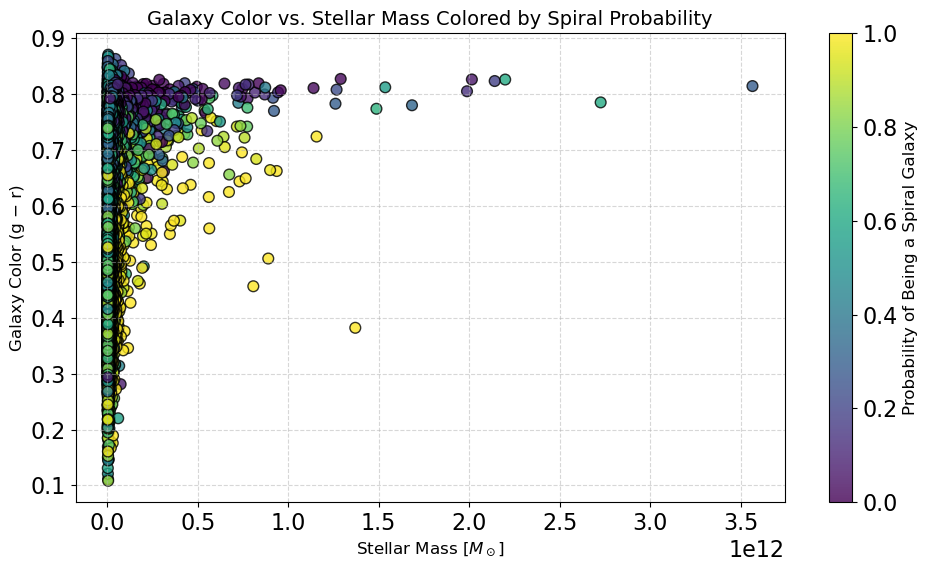

In [21]:
import matplotlib.pyplot as plt

# Create scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    galaxies['Stellar Mass [Mo]'],   # x-axis: galaxy stellar mass
    galaxies['color'],               # y-axis: color (g - r)
    c=galaxies['Probability is spiral'],  # point color is based on spiral probability
    cmap='viridis',                  # colormap used to convert values into colors
    s=60,                            # marker size
    edgecolor='k',                   # black edges around the points
    alpha=0.8                        # transparency of the points
)
# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Probability of Being a Spiral Galaxy', fontsize=12)

# Labels and title
plt.xlabel('Stellar Mass [$M_\\odot$]', fontsize=12)
plt.ylabel('Galaxy Color (g − r)', fontsize=12)
plt.title('Galaxy Color vs. Stellar Mass Colored by Spiral Probability', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
# This plot  visually explores the relationship between stellar mass, galaxy color, and the likelihood of a galaxy being spiral.

**According to your graph set up...**

**What is the independent variable?**

**Answer:** Stellar Mass [Mo]


**What is the dependent variable?**

**Answer:** Galaxy Color (g-r)


**What could a control variable be?**

**Answer:** The probabaility is spiral 

**What shapes or trends do you see in the data?**

**Answer:** There is a dense cluster of galaxies at lower stellar masses with a broader range of colors.
Higher stellar masses tend to be more tightly grouped in color (often redder).
Ellipticals (cooler colors) appear more at higher masses and redder colors.

**What could this mean physically/astronomically?**

**Answer:** Low-mass galaxies are more likely to be star-forming, spiral galaxies, hence bluer colors and higher spiral probability.

High-mass galaxies tend to be older, with less star formation, making them redder and more likely to be elliptical.


**What further questions does this raise?**  Two questions: 1: How does galaxy environment (e.g., isolated vs. cluster) influence this mass-color-morphology relationship? 2: Could there be outliers with high mass that are still blue and spiral? Why?


**Answer:**

## Reflection

Write down some notes in your lab notebook about what you've learned in this unit about simulated galaxies. Be sure to include some astronomy and some coding. 